In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
import pandas as pd
import numpy as np

In [4]:
lib_stat = pd.read_csv("results/fitness_distribution/max/all_lib_stats.csv", index_col=0)
lib_stat

,lib,n_mut_cuttoff,lib_basic_dict,fit_basic_dict,cauchy,kde
0,DHFR,0,"{'n_site': 3, 'numb_measured': 8000, 'percent_...","{'mean': 0.15794490868184022, 'std': 0.1275673...","{'loc': 0.12713224210063334, 'scale': 0.001737...","{'peaks': [0.1275662158236592, 0.5084256342965..."
1,DHFR,1,"{'n_site': 3, 'numb_measured': 58, 'percent_me...","{'mean': 0.265664243587611, 'std': 0.279157674...","{'loc': 0.26544618245704277, 'scale': 0.083840...","{'peaks': [0.14398807743504038, 0.299573191252..."
2,DHFR,2,"{'n_site': 3, 'numb_measured': 1141, 'percent_...","{'mean': 0.25650460769733785, 'std': 0.1310729...","{'loc': 0.12787730504263345, 'scale': 0.005662...","{'peaks': [0.1315730494255245, 0.4899688201977..."
3,GB1,0,"{'n_site': 4, 'numb_measured': 149361, 'percen...","{'mean': 0.009188541513633722, 'std': 0.000386...","{'loc': 0.0002933800386363465, 'scale': 0.0002...","{'peaks': [0.001001001001001001, 0.15015015015..."
4,GB1,1,"{'n_site': 4, 'numb_measured': 77, 'percent_me...","{'mean': 0.0736296883010567, 'std': 0.01418649...","{'loc': 0.005832242022806541, 'scale': 0.01475...","{'peaks': [0.01196928449026897, 0.422560648002..."
5,GB1,2,"{'n_site': 4, 'numb_measured': 2168, 'percent_...","{'mean': 0.035159396666492766, 'std': 0.002241...","{'loc': 0.0009651816727329432, 'scale': 0.0020...","{'peaks': [0.0036951493624763202, 0.2709776199..."
6,TrpB3A,0,"{'n_site': 3, 'numb_measured': 7971, 'percent_...","{'mean': -0.03923114233002105, 'std': -0.03975...","{'loc': -0.03994396615879374, 'scale': 0.02442...","{'peaks': [-0.3944951616078841, -0.31702320818..."
7,TrpB3A,1,"{'n_site': 3, 'numb_measured': 57, 'percent_me...","{'mean': 0.06193767662823346, 'std': 0.0136003...","{'loc': 0.004323182695186965, 'scale': 0.02989...","{'peaks': [0.007094147970803655, 0.92094698630..."
8,TrpB3A,2,"{'n_site': 3, 'numb_measured': 1137, 'percent_...","{'mean': -0.019419151829035922, 'std': -0.0216...","{'loc': -0.021119835332288128, 'scale': 0.0240...","{'peaks': [-0.02136493695996955, 0.27745545481..."
9,TrpB3B,0,"{'n_site': 3, 'numb_measured': 7996, 'percent_...","{'mean': -0.055223294654549754, 'std': -0.0555...","{'loc': -0.055374165544969954, 'scale': 0.0179...","{'peaks': [-0.3315353103440577, -0.25764490240..."


In [5]:
de_df = pd.read_csv("results/simulations/DE-active/scale2max/all_landscape_de_summary.csv")
de_df

,lib,de_type,mean_all,median_all,mean_top96,median_top96,mean_top384,median_top384,fraction_max
0,DHFR,single_step_DE,0.889922,0.857847,1.000000,1.000000,1.000000,1.000000,0.283568
1,DHFR,recomb_SSM,0.851463,0.847249,0.999315,1.000000,0.949198,0.959943,0.090164
2,DHFR,top96_SSM,0.959305,1.000000,1.000000,1.000000,1.000000,1.000000,0.632319
3,GB1,single_step_DE,0.571523,0.597319,1.000000,1.000000,1.000000,1.000000,0.026045
4,GB1,recomb_SSM,0.362927,0.370170,0.978695,1.000000,0.887291,0.862211,0.002055
5,GB1,top96_SSM,0.611348,0.620935,1.000000,1.000000,1.000000,1.000000,0.025040
6,TrpB3A,single_step_DE,0.401312,0.200246,0.993309,1.000000,NaN,NaN,0.254237
7,TrpB3A,recomb_SSM,0.401256,0.190336,NaN,NaN,NaN,NaN,0.220339
8,TrpB3A,top96_SSM,0.428916,0.230815,NaN,NaN,NaN,NaN,0.288136
9,TrpB3B,single_step_DE,0.271319,0.127970,0.294215,0.127970,NaN,NaN,0.166667


In [6]:
# clean up the nan if not full N
# Fill NaNs in 'mean_top96' and 'median_top96' from 'mean_all' and 'median_all'
de_df["mean_top96"] = de_df["mean_top96"].fillna(de_df["mean_all"])
de_df["median_top96"] = de_df["median_top96"].fillna(de_df["median_all"])

# Fill NaNs in 'mean_top384' and 'median_top384' from 'mean_top96' and 'median_top96'
de_df["mean_top384"] = de_df["mean_top384"].fillna(de_df["mean_top96"])
de_df["median_top384"] = de_df["median_top384"].fillna(de_df["median_top96"])


In [7]:
mlde_df = pd.read_csv("results/mlde/vis/all_df.csv")
mlde_df

,encoding,model,n_sample,ft_lib,rep,maxes_all,means_all,maxes,means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top
0,esm2_t33_650M_UR50D-flatten_site,boosting,384,4000,0,0.840951,0.156936,1.000000,0.499483,0.930975,0.498705,1.0,267.0,all,DHFR,Triad_score,384
1,esm2_t33_650M_UR50D-flatten_site,boosting,384,4000,1,0.837710,0.159552,0.996537,0.500002,0.932816,0.480707,0.0,NaN,all,DHFR,Triad_score,384
2,esm2_t33_650M_UR50D-flatten_site,boosting,384,4000,2,0.841871,0.158632,0.996537,0.464790,0.901309,0.464723,0.0,NaN,all,DHFR,Triad_score,384
3,esm2_t33_650M_UR50D-flatten_site,boosting,384,4000,3,0.812338,0.180189,1.000000,0.474807,0.926957,0.420841,1.0,2.0,all,DHFR,Triad_score,384
4,esm2_t33_650M_UR50D-flatten_site,boosting,384,4000,4,0.841787,0.162283,1.000000,0.485674,0.923643,0.430931,1.0,274.0,all,DHFR,Triad_score,384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245995,one-hot,ridge,384,77,95,0.771698,0.017581,0.749107,0.330329,0.979702,0.190245,0.0,NaN,single,TrpB4,none,96
245996,one-hot,ridge,384,77,96,0.597178,0.060315,0.749107,0.361424,0.980491,0.190741,0.0,NaN,single,TrpB4,none,96
245997,one-hot,ridge,384,77,97,0.634966,0.009730,0.752895,0.428029,0.981345,0.193477,0.0,NaN,single,TrpB4,none,96
245998,one-hot,ridge,384,77,98,0.783760,0.040222,0.749107,0.284615,0.979312,0.188739,0.0,NaN,single,TrpB4,none,96


In [8]:
mlde_df[
    (mlde_df["zs"] == "none")
    & (mlde_df["encoding"] == "one-hot")
    & (mlde_df["model"] == "boosting")
    & (mlde_df["n_mut_cutoff"] == "all")
    & (mlde_df["n_top"] == 96)
]

,encoding,model,n_sample,ft_lib,rep,maxes_all,means_all,maxes,means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top
210800,one-hot,boosting,384,8000,0,0.998287,0.155545,1.000000,0.551468,0.931935,0.485444,1.0,0.0,all,DHFR,none,96
210801,one-hot,boosting,384,8000,1,0.829062,0.157209,1.000000,0.626697,0.945184,0.486228,1.0,78.0,all,DHFR,none,96
210802,one-hot,boosting,384,8000,2,0.964821,0.164878,1.000000,0.647137,0.956728,0.482920,1.0,4.0,all,DHFR,none,96
210803,one-hot,boosting,384,8000,3,0.936785,0.154625,1.000000,0.672220,0.964112,0.475982,1.0,7.0,all,DHFR,none,96
210804,one-hot,boosting,384,8000,4,0.979447,0.154048,1.000000,0.679334,0.960879,0.497635,1.0,7.0,all,DHFR,none,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221895,one-hot,boosting,384,159129,95,0.424082,0.017496,0.640630,0.274401,0.980378,0.232898,0.0,NaN,all,TrpB4,none,96
221896,one-hot,boosting,384,159129,96,0.341062,0.015333,0.655536,0.210972,0.975896,0.194796,0.0,NaN,all,TrpB4,none,96
221897,one-hot,boosting,384,159129,97,0.508165,0.015933,1.000000,0.358148,0.980344,0.214661,1.0,93.0,all,TrpB4,none,96
221898,one-hot,boosting,384,159129,98,0.401224,0.019547,0.735563,0.330487,0.979452,0.210808,0.0,NaN,all,TrpB4,none,96


In [10]:
mlde_avg = mlde_df[
    (mlde_df["zs"] == "none")
    & (mlde_df["encoding"] == "one-hot")
    & (mlde_df["model"] == "boosting")
    & (mlde_df["n_mut_cutoff"] == "all")
    & (mlde_df["n_sample"] == 384)
    & (mlde_df["n_top"] == 96)
][["lib", "maxes", "means", "ndcgs", "rhos", "if_truemaxs"]].groupby("lib").mean()
mlde_avg

,maxes,means,ndcgs,rhos,if_truemaxs
lib,,,,,
DHFR,0.961683,0.602670,0.940110,0.490817,0.54
GB1,0.676405,0.180360,0.780896,0.455742,0.04
TrpB3A,0.545842,0.010313,0.987780,0.433589,0.30
TrpB3B,0.320358,-0.033105,0.986987,0.244875,0.20
TrpB3C,0.384012,-0.008548,0.985357,0.318002,0.10
TrpB3D,0.938192,0.212361,0.980332,0.360104,0.41
TrpB3E,0.600019,0.040154,0.983239,0.118172,0.42
TrpB3F,0.964013,0.069949,0.985816,0.180791,0.87
TrpB3G,0.877840,0.086610,0.978737,0.186296,0.59


In [10]:
mlde_df[
    (mlde_df["zs"] == "none")
    & (mlde_df["encoding"] == "one-hot")
    & (mlde_df["model"] == "boosting")
    & (mlde_df["n_mut_cutoff"] == "all")
    & (mlde_df["n_top"] == 96)
][["lib", "maxes", "means", "ndcgs", "rhos", "if_truemaxs"]].groupby("lib").mean()["maxes"]

lib
DHFR      0.961683
GB1       0.676405
TrpB3A    0.545842
TrpB3B    0.320358
TrpB3C    0.384012
TrpB3D    0.938192
TrpB3E    0.600019
TrpB3F    0.964013
TrpB3G    0.877840
TrpB3H    0.503986
TrpB3I    0.967592
TrpB4     0.771810
Name: maxes, dtype: float64

In [19]:
mlde_df["zs"].unique()

array(['Triad_score', 'esm_score', 'ev_score', 'none'], dtype=object)

In [21]:
mlde_df[
    (mlde_df["zs"] == "Triad_score")
    & (mlde_df["encoding"] == "one-hot")
    & (mlde_df["model"] == "boosting")
    & (mlde_df["n_mut_cutoff"] == "all")
    & (mlde_df["n_sample"] == 384)
    & (mlde_df["n_top"] == 96)
]

,encoding,model,n_sample,ft_lib,rep,maxes_all,means_all,maxes,means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top
2400,one-hot,boosting,384,4000,0,0.837839,0.160675,0.982530,0.582432,0.931561,0.512189,0.0,NaN,all,DHFR,Triad_score,96
2401,one-hot,boosting,384,4000,1,0.835335,0.163866,1.000000,0.541919,0.919135,0.520578,1.0,22.0,all,DHFR,Triad_score,96
2402,one-hot,boosting,384,4000,2,0.839829,0.157905,0.969296,0.435451,0.894345,0.528852,0.0,NaN,all,DHFR,Triad_score,96
2403,one-hot,boosting,384,4000,3,0.811491,0.171549,0.865538,0.565615,0.917335,0.499166,0.0,NaN,all,DHFR,Triad_score,96
2404,one-hot,boosting,384,4000,4,0.839540,0.174150,0.996537,0.559871,0.911455,0.507032,0.0,NaN,all,DHFR,Triad_score,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35695,one-hot,boosting,384,20000,95,0.649808,0.023584,0.742180,0.268452,0.980305,0.226166,0.0,NaN,all,TrpB4,Triad_score,96
35696,one-hot,boosting,384,20000,96,0.719495,0.025201,0.726449,0.333389,0.981026,0.223291,0.0,NaN,all,TrpB4,Triad_score,96
35697,one-hot,boosting,384,20000,97,0.722917,0.032412,0.780117,0.270929,0.980317,0.192198,0.0,NaN,all,TrpB4,Triad_score,96
35698,one-hot,boosting,384,20000,98,0.747030,0.031346,0.752895,0.324654,0.978877,0.179204,0.0,NaN,all,TrpB4,Triad_score,96


In [23]:
mlde_triad = (
    mlde_df[
        (mlde_df["zs"] == "Triad_score")
        & (mlde_df["encoding"] == "one-hot")
        & (mlde_df["model"] == "boosting")
        & (mlde_df["n_mut_cutoff"] == "all")
        & (mlde_df["n_sample"] == 384)
        & (mlde_df["n_top"] == 96)
    ][["lib", "maxes", "means", "ndcgs", "rhos", "if_truemaxs"]]
    .groupby("lib")
    .mean()
    .rename(
        columns={
            "maxes": "maxes_Triad",
            "means": "means_Triad",
            "ndcgs": "ndcgs_Triad",
            "rhos": "rhos_Triad",
            "if_truemaxs": "if_truemaxs_Triad",
        }
    )
)
mlde_triad

,maxes_Triad,means_Triad,ndcgs_Triad,rhos_Triad,if_truemaxs_Triad
lib,,,,,
DHFR,0.923962,0.525328,0.892851,0.471194,0.210000
GB1,0.787354,0.263706,0.812145,0.422946,0.143333
TrpB3A,0.856262,0.027353,0.988498,0.346032,0.690000
TrpB3B,0.457383,-0.031794,0.987161,0.190560,0.283333
TrpB3C,0.576870,-0.000256,0.985598,0.269709,0.313333
TrpB3D,0.969675,0.258642,0.983283,0.343636,0.663333
TrpB3E,0.886542,0.072064,0.986547,0.115476,0.820000
TrpB3F,0.999839,0.100809,0.987903,0.155692,0.996667
TrpB3G,0.965963,0.125438,0.982809,0.172821,0.863333


In [24]:
mlde_esm = (
    mlde_df[
        (mlde_df["zs"] == "esm_score")
        & (mlde_df["encoding"] == "one-hot")
        & (mlde_df["model"] == "boosting")
        & (mlde_df["n_mut_cutoff"] == "all")
        & (mlde_df["n_sample"] == 384)
        & (mlde_df["n_top"] == 96)
    ][["lib", "maxes", "means", "ndcgs", "rhos", "if_truemaxs"]]
    .groupby("lib")
    .mean()
    .rename(
        columns={
            "maxes": "maxes_esm",
            "means": "means_esm",
            "ndcgs": "ndcgs_esm",
            "rhos": "rhos_esm",
            "if_truemaxs": "if_truemaxs_esm",
        }
    )
)
mlde_esm

,maxes_esm,means_esm,ndcgs_esm,rhos_esm,if_truemaxs_esm
lib,,,,,
DHFR,0.945933,0.688334,0.959897,0.414557,0.523333
GB1,0.648240,0.141950,0.753146,0.348630,0.066667
TrpB3A,0.592200,0.003912,0.986614,0.347897,0.356667
TrpB3B,0.140204,-0.038792,0.986045,0.185177,0.016667
TrpB3C,0.403994,-0.013132,0.984699,0.267085,0.106667
TrpB3D,0.955762,0.223565,0.980542,0.322792,0.700000
TrpB3E,0.515066,0.026680,0.981802,0.109923,0.293333
TrpB3F,0.881485,0.060563,0.984891,0.167842,0.783333
TrpB3G,0.920684,0.121349,0.981644,0.185964,0.736667


In [25]:
mlde_ev = (
    mlde_df[
        (mlde_df["zs"] == "ev_score")
        & (mlde_df["encoding"] == "one-hot")
        & (mlde_df["model"] == "boosting")
        & (mlde_df["n_mut_cutoff"] == "all")
        & (mlde_df["n_sample"] == 384)
        & (mlde_df["n_top"] == 96)
    ][["lib", "maxes", "means", "ndcgs", "rhos", "if_truemaxs"]]
    .groupby("lib")
    .mean()
    .rename(
        columns={
            "maxes": "maxes_ev",
            "means": "means_ev",
            "ndcgs": "ndcgs_ev",
            "rhos": "rhos_ev",
            "if_truemaxs": "if_truemaxs_ev",
        }
    )
)
mlde_ev

,maxes_ev,means_ev,ndcgs_ev,rhos_ev,if_truemaxs_ev
lib,,,,,
DHFR,0.994257,0.743928,0.976535,0.389861,0.933333
GB1,0.760395,0.238704,0.804539,0.413544,0.106667
TrpB3A,0.846112,0.019725,0.988736,0.396824,0.660000
TrpB3B,0.447727,-0.030359,0.987560,0.216303,0.273333
TrpB3C,0.586715,-0.004742,0.985534,0.285865,0.330000
TrpB3D,0.978959,0.264122,0.984055,0.377430,0.653333
TrpB3E,0.917460,0.077361,0.988109,0.115061,0.880000
TrpB3F,0.996035,0.101872,0.988164,0.168336,0.983333
TrpB3G,0.968681,0.135609,0.984122,0.164757,0.890000


In [11]:
from ast import literal_eval

In [92]:
lib_stat_all = lib_stat[lib_stat["n_mut_cuttoff"]== 0]

lib_df = pd.concat(
        [
            lib_stat_all["lib"],
            lib_stat_all["lib_basic_dict"].apply(literal_eval).apply(pd.Series),
            lib_stat_all["fit_basic_dict"].apply(literal_eval).apply(pd.Series),
            lib_stat_all["cauchy"].apply(literal_eval).apply(pd.Series),
            lib_stat_all["kde"].apply(literal_eval).apply(pd.Series),

        ],
        axis=1,
    )
lib_df["parent_rank_percent"] = lib_df["parent_rank"] / lib_df["numb_measured"]
# qs = pd.DataFrame(lib_df['quartiles'].tolist(), index=lib_df.index)
# qs.columns =   # Rename columns

df_expanded = lib_df['quartiles'].apply(pd.Series)
df_expanded.columns = ['Q1', 'Q2', 'Q3'] # Rename columns
df_expanded["numb_kde_peak"] = lib_df["peak_kde"].apply(len)

lib_df = pd.concat([lib_df, df_expanded], axis=1)

sliced_lib_basic_df = lib_df[["lib", "n_site", "percent_active", "parent_rank_percent", "parent_rank", "mean", 'Q1', 'Q2', 'Q3']]
sliced_lib_basic_df

,lib,n_site,percent_active,parent_rank_percent,parent_rank,mean,Q1,Q2,Q3
0,DHFR,3.0,10.675000,0.075250,602.0,0.157945,0.125979,0.127567,0.129802
3,GB1,4.0,23.128528,0.024397,3644.0,0.009189,0.000156,0.000386,0.001026
6,TrpB3A,3.0,0.740183,0.000125,1.0,-0.039231,-0.066102,-0.039751,-0.013193
9,TrpB3B,3.0,0.225113,0.000125,1.0,-0.055223,-0.074532,-0.055559,-0.036157
12,TrpB3C,3.0,0.437828,0.000125,1.0,-0.073327,-0.120727,-0.073272,-0.026945
15,TrpB3D,3.0,9.261883,0.001288,10.0,0.018834,-0.014157,0.005591,0.030403
18,TrpB3E,3.0,2.021597,0.000628,5.0,0.002082,-0.009732,0.000920,0.011806
21,TrpB3F,3.0,1.059842,0.000129,1.0,-0.023140,-0.044622,-0.023111,-0.001569
24,TrpB3G,3.0,1.368648,0.001647,13.0,-0.002391,-0.015855,-0.003677,0.007509
27,TrpB3H,3.0,0.686884,0.000518,4.0,-0.014140,-0.025450,-0.015079,-0.004315


In [91]:
lib_df.columns

Index(['lib', 'n_site', 'numb_measured', 'percent_measured', 'numb_active',
       'percent_active', 'active_fit_min', 'parent_fit', 'parent_rank', 'mean',
       'std', 'range', 'iqr', 'std_dev', 'variance', 'skewness', 'kurt',
       'quartiles', 'loc', 'scale', 'peaks', 'peak_kde', 'percentiles',
       'pdf_values', 'parent_rank_percent', 'Q1', 'Q2', 'Q3', 'numb_kde_peak'],
      dtype='object')

In [16]:
sliced_de_df = de_df[de_df["de_type"] == "recomb_SSM"]
sliced_de_df

,lib,de_type,mean_all,median_all,mean_top96,median_top96,mean_top384,median_top384,fraction_max
1,DHFR,recomb_SSM,0.851463,0.847249,0.999315,1.000000,0.949198,0.959943,0.090164
4,GB1,recomb_SSM,0.362927,0.370170,0.978695,1.000000,0.887291,0.862211,0.002055
7,TrpB3A,recomb_SSM,0.401256,0.190336,0.401256,0.190336,0.401256,0.190336,0.220339
10,TrpB3B,recomb_SSM,0.271319,0.127970,0.271319,0.127970,0.271319,0.127970,0.166667
13,TrpB3C,recomb_SSM,0.374458,0.310257,0.374458,0.310257,0.374458,0.310257,0.114286
16,TrpB3D,recomb_SSM,0.647904,0.683433,0.992109,0.986226,0.862228,0.841344,0.057024
19,TrpB3E,recomb_SSM,0.249992,0.074268,0.380886,0.103098,0.380886,0.103098,0.167702
22,TrpB3F,recomb_SSM,0.653587,0.951595,0.653587,0.951595,0.653587,0.951595,0.414634
25,TrpB3G,recomb_SSM,0.586418,0.635331,0.649076,0.704780,0.649076,0.704780,0.203704
28,TrpB3H,recomb_SSM,0.347797,0.074269,0.347797,0.074269,0.347797,0.074269,0.169811


In [97]:
merged_active_de = pd.merge(lib_df, sliced_de_df, on="lib")
merged_active_de

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,Q3,numb_kde_peak,de_type,mean_all,median_all,mean_top96,median_top96,mean_top384,median_top384,fraction_max
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,0.129802,7,recomb_SSM,0.851463,0.847249,0.999315,1.000000,0.949198,0.959943,0.090164
1,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,0.001026,33,recomb_SSM,0.362927,0.370170,0.978695,1.000000,0.887291,0.862211,0.002055
2,TrpB3A,3.0,7971.0,99.637500,59.0,0.740183,0.097444,1.000000,1.0,-0.039231,...,-0.013193,9,recomb_SSM,0.401256,0.190336,0.401256,0.190336,0.401256,0.190336,0.220339
3,TrpB3B,3.0,7996.0,99.950000,18.0,0.225113,0.086085,1.000000,1.0,-0.055223,...,-0.036157,8,recomb_SSM,0.271319,0.127970,0.271319,0.127970,0.271319,0.127970,0.166667
4,TrpB3C,3.0,7994.0,99.925000,35.0,0.437828,0.207105,1.000000,1.0,-0.073327,...,-0.026945,8,recomb_SSM,0.374458,0.310257,0.374458,0.310257,0.374458,0.310257,0.114286
5,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,0.030403,13,recomb_SSM,0.647904,0.683433,0.992109,0.986226,0.862228,0.841344,0.057024
6,TrpB3E,3.0,7964.0,99.550000,161.0,2.021597,0.041910,0.610622,5.0,0.002082,...,0.011806,15,recomb_SSM,0.249992,0.074268,0.380886,0.103098,0.380886,0.103098,0.167702
7,TrpB3F,3.0,7737.0,96.712500,82.0,1.059842,0.092374,1.000000,1.0,-0.023140,...,-0.001569,15,recomb_SSM,0.653587,0.951595,0.653587,0.951595,0.653587,0.951595,0.414634
8,TrpB3G,3.0,7891.0,98.637500,108.0,1.368648,0.072712,0.519956,13.0,-0.002391,...,0.007509,23,recomb_SSM,0.586418,0.635331,0.649076,0.704780,0.649076,0.704780,0.203704
9,TrpB3H,3.0,7716.0,96.450000,53.0,0.686884,0.039519,0.560785,4.0,-0.014140,...,-0.004315,13,recomb_SSM,0.347797,0.074269,0.347797,0.074269,0.347797,0.074269,0.169811


In [98]:
simple_merge = pd.merge(merged_active_de, mlde_avg, on="lib")
for mlde_df in [mlde_triad, mlde_esm, mlde_ev]:
    simple_merge = pd.merge(simple_merge, mlde_df, on="lib")
simple_merge

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,maxes_esm,means_esm,ndcgs_esm,rhos_esm,if_truemaxs_esm,maxes_ev,means_ev,ndcgs_ev,rhos_ev,if_truemaxs_ev
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,0.945933,0.688334,0.959897,0.414557,0.523333,0.994257,0.743928,0.976535,0.389861,0.933333
1,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,0.648240,0.141950,0.753146,0.348630,0.066667,0.760395,0.238704,0.804539,0.413544,0.106667
2,TrpB3A,3.0,7971.0,99.637500,59.0,0.740183,0.097444,1.000000,1.0,-0.039231,...,0.592200,0.003912,0.986614,0.347897,0.356667,0.846112,0.019725,0.988736,0.396824,0.660000
3,TrpB3B,3.0,7996.0,99.950000,18.0,0.225113,0.086085,1.000000,1.0,-0.055223,...,0.140204,-0.038792,0.986045,0.185177,0.016667,0.447727,-0.030359,0.987560,0.216303,0.273333
4,TrpB3C,3.0,7994.0,99.925000,35.0,0.437828,0.207105,1.000000,1.0,-0.073327,...,0.403994,-0.013132,0.984699,0.267085,0.106667,0.586715,-0.004742,0.985534,0.285865,0.330000
5,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,0.955762,0.223565,0.980542,0.322792,0.700000,0.978959,0.264122,0.984055,0.377430,0.653333
6,TrpB3E,3.0,7964.0,99.550000,161.0,2.021597,0.041910,0.610622,5.0,0.002082,...,0.515066,0.026680,0.981802,0.109923,0.293333,0.917460,0.077361,0.988109,0.115061,0.880000
7,TrpB3F,3.0,7737.0,96.712500,82.0,1.059842,0.092374,1.000000,1.0,-0.023140,...,0.881485,0.060563,0.984891,0.167842,0.783333,0.996035,0.101872,0.988164,0.168336,0.983333
8,TrpB3G,3.0,7891.0,98.637500,108.0,1.368648,0.072712,0.519956,13.0,-0.002391,...,0.920684,0.121349,0.981644,0.185964,0.736667,0.968681,0.135609,0.984122,0.164757,0.890000
9,TrpB3H,3.0,7716.0,96.450000,53.0,0.686884,0.039519,0.560785,4.0,-0.014140,...,0.741545,0.010154,0.980515,0.068129,0.380000,0.806660,0.015818,0.981833,0.064965,0.480000


In [30]:
simple_merge.columns

Index(['lib', 'n_site', 'numb_measured', 'percent_measured', 'numb_active',
       'percent_active', 'active_fit_min', 'parent_fit', 'parent_rank', 'mean',
       'std', 'range', 'iqr', 'std_dev', 'variance', 'skewness', 'kurt',
       'quartiles', 'loc', 'scale', 'peaks', 'peak_kde', 'percentiles',
       'pdf_values', 'parent_rank_percent', 'Q1', 'Q2', 'Q3', 'de_type',
       'mean_all', 'median_all', 'mean_top96', 'median_top96', 'mean_top384',
       'median_top384', 'fraction_max', 'maxes', 'means', 'ndcgs', 'rhos',
       'if_truemaxs', 'maxes_Triad', 'means_Triad', 'ndcgs_Triad',
       'rhos_Triad', 'if_truemaxs_Triad', 'maxes_esm', 'means_esm',
       'ndcgs_esm', 'rhos_esm', 'if_truemaxs_esm', 'maxes_ev', 'means_ev',
       'ndcgs_ev', 'rhos_ev', 'if_truemaxs_ev'],
      dtype='object')

In [31]:
# summary for local opts

from glob import glob
import pandas as pd 

In [32]:
from SSMuLA.landscape_global import get_file_name

In [33]:

loc_opt_list = glob("results/local_optima/scale2max/*.csv")
loc_opt_list

['results/local_optima/scale2max/TrpB3F_loc_opt_escape.csv',
 'results/local_optima/scale2max/TrpB3E_loc_opt_escape.csv',
 'results/local_optima/scale2max/DHFR_loc_opt_escape.csv',
 'results/local_optima/scale2max/TrpB3B_loc_opt_escape.csv',
 'results/local_optima/scale2max/TrpB3H_loc_opt_escape.csv',
 'results/local_optima/scale2max/TrpB3G_loc_opt_escape.csv',
 'results/local_optima/scale2max/TrpB4_loc_opt_escape.csv',
 'results/local_optima/scale2max/TrpB3A_loc_opt_escape.csv',
 'results/local_optima/scale2max/TrpB3I_loc_opt_escape.csv',
 'results/local_optima/scale2max/TrpB3D_loc_opt_escape.csv',
 'results/local_optima/scale2max/TrpB3C_loc_opt_escape.csv']

In [36]:
pd.read_csv("results/local_optima/scale2max/DHFR_loc_opt_escape.csv")

,AAs,AA1,AA2,AA3,fitness,active,muts,n_escape,"(0, 1)","(0, 2)","(1, 2)",frac pairs no escape,frac pairs that escape
0,FDV,F,D,V,0.846091,True,A26F:L28V,5,0,0,0,1.0,0.0
1,KEM,K,E,M,1.000000,True,A26K:D27E:L28M,0,0,0,0,1.0,0.0
2,TDW,T,D,W,0.847249,True,A26T:L28W,4,0,0,0,1.0,0.0


In [34]:
loc_opt_df = pd.DataFrame()

for lo in loc_opt_list:
    lo_df = pd.read_csv(lo)
    loc_opt_df = loc_opt_df._append({"lib": get_file_name(lo).replace("_loc_opt_escape", ""), "n_locopt": len(lo_df)}, ignore_index=True)
    # pd.concat([loc_opt_df, pd.read_csv(lo)], ignore_index=True)

if "GB1" not in loc_opt_df["lib"].values:
    loc_opt_df = loc_opt_df._append({"lib": "GB1", "n_locopt": 181}, ignore_index=True)

In [35]:
loc_opt_df

,lib,n_locopt
0,TrpB3F,18
1,TrpB3E,52
2,DHFR,3
3,TrpB3B,12
4,TrpB3H,29
5,TrpB3G,23
6,TrpB4,525
7,TrpB3A,23
8,TrpB3I,15
9,TrpB3D,30


In [109]:
simple_merge = pd.merge(simple_merge, loc_opt_df, on="lib")
simple_merge

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,maxes_ev,means_ev,ndcgs_ev,rhos_ev,if_truemaxs_ev,delta,triad_delta,esm_delta,ev_delta,n_locopt
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,0.994257,0.743928,0.976535,0.389861,0.933333,0.110220,0.072499,0.094470,0.142795,3
1,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,0.760395,0.238704,0.804539,0.413544,0.106667,0.313478,0.424426,0.285313,0.397467,181
2,TrpB3A,3.0,7971.0,99.637500,59.0,0.740183,0.097444,1.000000,1.0,-0.039231,...,0.846112,0.019725,0.988736,0.396824,0.660000,0.144587,0.455006,0.190945,0.444856,23
3,TrpB3B,3.0,7996.0,99.950000,18.0,0.225113,0.086085,1.000000,1.0,-0.055223,...,0.447727,-0.030359,0.987560,0.216303,0.273333,0.049039,0.186064,-0.131115,0.176408,12
4,TrpB3C,3.0,7994.0,99.925000,35.0,0.437828,0.207105,1.000000,1.0,-0.073327,...,0.586715,-0.004742,0.985534,0.285865,0.330000,0.009554,0.202412,0.029536,0.212256,18
5,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,0.978959,0.264122,0.984055,0.377430,0.653333,0.290288,0.321771,0.307859,0.331056,30
6,TrpB3E,3.0,7964.0,99.550000,161.0,2.021597,0.041910,0.610622,5.0,0.002082,...,0.917460,0.077361,0.988109,0.115061,0.880000,0.350026,0.636549,0.265073,0.667467,52
7,TrpB3F,3.0,7737.0,96.712500,82.0,1.059842,0.092374,1.000000,1.0,-0.023140,...,0.996035,0.101872,0.988164,0.168336,0.983333,0.310426,0.346251,0.227897,0.342447,18
8,TrpB3G,3.0,7891.0,98.637500,108.0,1.368648,0.072712,0.519956,13.0,-0.002391,...,0.968681,0.135609,0.984122,0.164757,0.890000,0.291422,0.379545,0.334265,0.382263,23
9,TrpB3H,3.0,7716.0,96.450000,53.0,0.686884,0.039519,0.560785,4.0,-0.014140,...,0.806660,0.015818,0.981833,0.064965,0.480000,0.156189,0.480752,0.393747,0.458862,29


Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
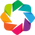

In [39]:

import bokeh
from bokeh.io import show, export_svg, export_png
from bokeh.plotting import show
from bokeh.themes.theme import Theme

bokeh.io.output_notebook()

import holoviews as hv
from holoviews import opts

hv.extension("bokeh", "matplotlib")


In [40]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [41]:
from holoviews import dim

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
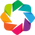

In [42]:
from SSMuLA.vis import LIB_COLORS

In [27]:
# Create a scatter plot
scatter_de = hv.Scatter(simple_merge, "percent_active", ["mean_all", "lib"]).opts(
    height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"], 
    # legend_labels="DE combo fraction max"
)
scatter_mlde = hv.Scatter(simple_merge, "percent_active", ["maxes", "lib"]).opts(
    height=400, width=400,  marker='*', color=dim("lib").categorize(LIB_COLORS),
    size=10, tools=["hover"], 
    # legend_labels="MLDE"
)

# Display the plot
scatter_de * scatter_mlde.opts(legend_position='right', logx=True)

:Overlay
   .Scatter.I  :Scatter   [percent_active]   (mean_all,lib)
   .Scatter.II :Scatter   [percent_active]   (maxes,lib)

In [43]:
simple_merge.columns

Index(['lib', 'n_site', 'numb_measured', 'percent_measured', 'numb_active',
       'percent_active', 'active_fit_min', 'parent_fit', 'parent_rank', 'mean',
       'std', 'range', 'iqr', 'std_dev', 'variance', 'skewness', 'kurt',
       'quartiles', 'loc', 'scale', 'peaks', 'peak_kde', 'percentiles',
       'pdf_values', 'parent_rank_percent', 'Q1', 'Q2', 'Q3', 'de_type',
       'mean_all', 'median_all', 'mean_top96', 'median_top96', 'mean_top384',
       'median_top384', 'fraction_max', 'maxes', 'means', 'ndcgs', 'rhos',
       'if_truemaxs', 'maxes_Triad', 'means_Triad', 'ndcgs_Triad',
       'rhos_Triad', 'if_truemaxs_Triad', 'maxes_esm', 'means_esm',
       'ndcgs_esm', 'rhos_esm', 'if_truemaxs_esm', 'maxes_ev', 'means_ev',
       'ndcgs_ev', 'rhos_ev', 'if_truemaxs_ev', 'n_locopt'],
      dtype='object')

In [103]:
simple_merge["delta"] = simple_merge["maxes"] - simple_merge["mean_all"]
simple_merge["triad_delta"] = simple_merge["maxes_Triad"] - simple_merge["mean_all"]
simple_merge["esm_delta"] = simple_merge["maxes_esm"] - simple_merge["mean_all"]
simple_merge["ev_delta"] = simple_merge["maxes_ev"] - simple_merge["mean_all"]

In [46]:
# Create a scatter plot
hv.Scatter(simple_merge, "percent_active", ["delta", "lib"]).opts(
    height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"], 
    # legend_labels="DE combo fraction max"
) * hv.Scatter(simple_merge, "percent_active", ["triad_delta", "lib"]).opts(
    height=400, width=400,  marker='*', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"], 
    # legend_labels="DE combo fraction max"
) * hv.Scatter(simple_merge, "percent_active", ["esm_delta", "lib"]).opts(
    height=400, width=400,  marker='square', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"], 
    # legend_labels="DE combo fraction max"
) * hv.Scatter(simple_merge, "percent_active", ["ev_delta", "lib"]).opts(
    height=400, width=400,  marker='triangle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"], 
    # legend_labels="DE combo fraction max"
).opts(logx=True)

:Overlay
   .Scatter.I   :Scatter   [percent_active]   (delta,lib)
   .Scatter.II  :Scatter   [percent_active]   (triad_delta,lib)
   .Scatter.III :Scatter   [percent_active]   (esm_delta,lib)
   .Scatter.IV  :Scatter   [percent_active]   (ev_delta,lib)

In [30]:
# Create a scatter plot
hv.Scatter(simple_merge, "percent_active", ["delta", "lib"]).opts(
    height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"], 
    # legend_labels="DE combo fraction max"
)

:Scatter   [percent_active]   (delta,lib)

In [31]:
LIB_COLORS

{'DHFR': '#f79646ff',
 'GB1': '#f9be00',
 'TrpB3A': '#89bf91',
 'TrpB3B': '#6db290',
 'TrpB3C': '#57a490',
 'TrpB3D': '#44948f',
 'TrpB3E': '#33858d',
 'TrpB3F': '#24768b',
 'TrpB3G': '#1c6689',
 'TrpB3H': '#215584',
 'TrpB3I': '#28437b',
 'TrpB4': '#666666'}

In [32]:
from bokeh.models import Legend, LegendItem

In [33]:
import matplotlib.pyplot as plt

In [120]:
from SSMuLA.vis import save_bokeh_hv

In [ ]:
"""
save_bokeh_hv(
    plot_obj,
    plot_name: str,
    plot_path: str,
    bokehorhv: str = "hv",
    dpi: int = 300,
    scale: int = 2,
    skippng: bool = False,
)
"""

In [58]:
hv.Scatter(simple_merge, "percent_active", ["delta", "lib"]).groupby(
    "lib"
).overlay().opts(
    hv.opts.Scatter(
        height=400,
        width=520,
        marker="o",
        size=10,
        tools=["hover"],
        show_legend=True,
        color=dim("lib").categorize(LIB_COLORS),
        legend_position="right",
        legend_offset=(5, 0),
        title="Percent Active vs Delta",
    )
)

:NdOverlay   [lib]
   :Scatter   [percent_active]   (delta,lib)

In [61]:
fac = "percent_active"
title = f"{fac} vs delta MLDE and DE max fitness achieved"
save_bokeh_hv(
    plot_obj=hv.Scatter(simple_merge, "percent_active", ["delta", "lib"]).groupby(
            "lib"
        ).overlay().opts(
            hv.opts.Scatter(
                height=400,
                width=500,
                marker="o",
                size=10,
                tools=["hover"],
                show_legend=True,
                color=dim("lib").categorize(LIB_COLORS),
                legend_position="right",
                legend_offset=(5, 0),
                title=title,
            )
        ),
    plot_name=title,
    plot_path="results/rules",
    bokehorhv= "hv",
    dpi = 300,
    scale = 2, 
)

In [62]:
fac = "percent_active"
title = f"{fac} vs delta MLDE and DE max fitness achieved"
save_bokeh_hv(
    plot_obj=hv.Scatter(simple_merge, "percent_active", ["delta", "lib"]).groupby(
            "lib"
        ).overlay().opts(
            hv.opts.Scatter(
                height=400,
                width=500,
                marker="o",
                size=10,
                tools=["hover"],
                show_legend=True,
                color=dim("lib").categorize(LIB_COLORS),
                legend_position="right",
                legend_offset=(5, 0),
                title=title,
                logx=True
            )
        ),
    plot_name=title,
    plot_path="results/rules/logx",
    bokehorhv= "hv",
    dpi = 300,
    scale = 2, 
)

In [ ]:
fac = "percent_active"
title = f"{fac} vs delta MLDE and DE max fitness achieved"
save_bokeh_hv(
    plot_obj=hv.Scatter(simple_merge, "percent_active", ["delta", "lib"]).groupby(
            "lib"
        ).overlay().opts(
            hv.opts.Scatter(
                height=400,
                width=500,
                marker="o",
                size=10,
                tools=["hover"],
                show_legend=True,
                color=dim("lib").categorize(LIB_COLORS),
                legend_position="right",
                legend_offset=(5, 0),
                title=title,
                logx=True
            )
        ),
    plot_name=title,
    plot_path="results/rules/logx",
    bokehorhv= "hv",
    dpi = 300,
    scale = 2, 
)

In [47]:
from scipy.stats import spearmanr

In [87]:
spearmanr(simple_merge["percent_active"], simple_merge["delta"])

SignificanceResult(statistic=0.49650349650349657, pvalue=0.10060263183225483)

In [88]:
for fac in ['n_site', 'percent_active', 'parent_rank_percent', 'parent_rank', 'Q1', 'Q2', 'Q3', 'n_locopt']:
    print(fac)
    print(spearmanr(simple_merge[fac], simple_merge["delta"]))

n_site
SignificanceResult(statistic=0.2591001102525183, pvalue=0.41610570500180954)
percent_active
SignificanceResult(statistic=0.49650349650349657, pvalue=0.10060263183225483)
parent_rank_percent
SignificanceResult(statistic=0.3846153846153847, pvalue=0.21702022575997748)
parent_rank
SignificanceResult(statistic=0.3666060832413798, pvalue=0.24114151944211676)
Q1
SignificanceResult(statistic=0.3706293706293707, pvalue=0.2356210035126457)
Q2
SignificanceResult(statistic=0.32867132867132864, pvalue=0.2969041156887641)
Q3
SignificanceResult(statistic=0.35664335664335667, pvalue=0.25513775175895725)
n_locopt
SignificanceResult(statistic=0.5614069646580031, pvalue=0.05751824698426699)


In [ ]:
spearmanr(simple_merge["percent_active"], simple_merge["delta"])

In [121]:
# Create a scatter plot
scatter_de = hv.Scatter(simple_merge, "n_locopt", ["mean_all", "lib"]).opts(
    height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"], 
    # legend_labels="DE combo fraction max"
)
scatter_mlde = hv.Scatter(simple_merge, "n_locopt", ["maxes", "lib"]).opts(
    height=400, width=400,  marker='*', color=dim("lib").categorize(LIB_COLORS),
    size=10, tools=["hover"], 
    # legend_labels="MLDE"
)

# Display the plot
scatter_de * scatter_mlde.opts(legend_position='right', 
logx=True
)

:Overlay
   .Scatter.I  :Scatter   [n_locopt]   (mean_all,lib)
   .Scatter.II :Scatter   [n_locopt]   (maxes,lib)

In [77]:
# Create a scatter plot
hv.Scatter(simple_merge, "n_locopt", ["delta", "lib"]).opts(
    height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"], 
    logx=True,
    show_legend=True, 
    legend_position="right",
    title="Number of local optima vs simple (MLDE - DE) achiving true top max fitness",
    # legend_labels="DE combo fraction max"
)

:Scatter   [n_locopt]   (delta,lib)

In [39]:
simple_merge.columns

Index(['lib', 'n_site', 'percent_active', 'parent_rank_percent', 'parent_rank',
       'mean', 'Q1', 'Q2', 'Q3', 'de_type', 'mean_all', 'median_all',
       'mean_top96', 'median_top96', 'mean_top384', 'median_top384',
       'fraction_max', 'maxes', 'means', 'ndcgs', 'rhos', 'if_truemaxs',
       'n_locopt', 'delta'],
      dtype='object')

In [81]:
# Create a scatter plot
(
    hv.Scatter(simple_merge, "percent_active", ["if_truemaxs", "lib"]).opts(
        height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
        alpha=0.8,
        size=10, tools=["hover"], 
        # legend_labels="DE combo fraction max"
    )
) * (
    hv.Scatter(simple_merge, "percent_active", ["fraction_max", "lib"]).opts(
        height=400, width=400,  marker='*', color=dim("lib").categorize(LIB_COLORS),
        size=10, tools=["hover"], 
        # legend_labels="MLDE"
    )
).opts(legend_position='right', logx=True)

:Overlay
   .Scatter.I  :Scatter   [percent_active]   (if_truemaxs,lib)
   .Scatter.II :Scatter   [percent_active]   (fraction_max,lib)

In [82]:
simple_merge["frac_delta"] = simple_merge["if_truemaxs"] - simple_merge["fraction_max"]
# Create a scatter plot
hv.Scatter(simple_merge, "percent_active", ["frac_delta", "lib"]).opts(
    height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"], logx=True,
    show_legend=True, 
    legend_position="right",
    title="Percent active vs simple (MLDE - DE) achiving true top max fitness",
    # legend_labels="DE combo fraction max"
)

:Scatter   [percent_active]   (frac_delta,lib)

In [83]:
simple_merge["frac_delta"] = simple_merge["if_truemaxs"] - simple_merge["fraction_max"]
# Create a scatter plot
hv.Scatter(simple_merge, "percent_active", ["frac_delta", "lib"]).opts(
    height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"],
    show_legend=True, 
    legend_position="right",
    title="Percent active vs simple (MLDE - DE) achiving true top max fitness",
    # legend_labels="DE combo fraction max"
)

:Scatter   [percent_active]   (frac_delta,lib)

In [84]:
simple_merge.columns

Index(['lib', 'n_site', 'percent_active', 'parent_rank_percent', 'parent_rank',
       'mean', 'Q1', 'Q2', 'Q3', 'de_type', 'mean_all', 'median_all',
       'mean_top96', 'median_top96', 'mean_top384', 'median_top384',
       'fraction_max', 'maxes', 'means', 'ndcgs', 'rhos', 'if_truemaxs',
       'n_locopt', 'delta', 'frac_delta'],
      dtype='object')

In [37]:
# normlize to different options 3- and 4-site landscapes can have
simple_merge["norm_frac_delta"] = simple_merge.apply(lambda row: (row["if_truemaxs"] - row["fraction_max"])* 20**(row["n_site"]-3), axis=1)
simple_merge["frac_delta"], simple_merge["norm_frac_delta"]

(0     0.449836
 1     0.037945
 2     0.079661
 3     0.033333
 4    -0.014286
 5     0.352976
 6     0.252298
 7     0.455366
 8     0.386296
 9     0.070189
 10    0.410329
 11    0.021090
 Name: frac_delta, dtype: float64,
 0     0.449836
 1     0.758894
 2     0.079661
 3     0.033333
 4    -0.014286
 5     0.352976
 6     0.252298
 7     0.455366
 8     0.386296
 9     0.070189
 10    0.410329
 11    0.421793
 Name: norm_frac_delta, dtype: float64)

In [38]:
hv.Scatter(simple_merge, "percent_active", ["norm_frac_delta", "lib"]).opts(
    height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"], logx=True,
    show_legend=True, 
    legend_position="right",
    title="Percent active vs simple (MLDE - DE) achiving true top max fitness norm to site number",
    # legend_labels="DE combo fraction max"
)

:Scatter   [percent_active]   (norm_frac_delta,lib)

In [54]:
simple_merge.columns

Index(['lib', 'n_site', 'percent_active', 'parent_rank_percent', 'parent_rank',
       'mean', 'Q1', 'Q2', 'Q3', 'de_type', 'mean_all', 'median_all',
       'mean_top96', 'median_top96', 'mean_top384', 'median_top384',
       'fraction_max', 'maxes', 'means', 'ndcgs', 'rhos', 'if_truemaxs'],
      dtype='object')

In [52]:
# Create a scatter plot
(
    hv.Scatter(simple_merge, "parent_rank_percent", ["maxes", "lib"]).opts(
        height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
        alpha=0.8,
        size=10, tools=["hover"], 
        # legend_labels="DE combo fraction max"
    )
) * (
    hv.Scatter(simple_merge, "parent_rank_percent", ["mean_all", "lib"]).opts(
        height=400, width=400,  marker='*', color=dim("lib").categorize(LIB_COLORS),
        size=10, tools=["hover"], 
        # legend_labels="MLDE"
    )
).opts(legend_position='right', logx=True)

:Overlay
   .Scatter.I  :Scatter   [parent_rank_percent]   (maxes,lib)
   .Scatter.II :Scatter   [parent_rank_percent]   (mean_all,lib)

In [58]:
simple_merge["frac_delta"] = simple_merge["if_truemaxs"] - simple_merge["fraction_max"]

hv.Scatter(simple_merge, "parent_rank_percent", ["frac_delta", "lib"]).opts(
    height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"], 
    logx=True,
    show_legend=True, 
    legend_position="right",
    title="Percent active vs simple (MLDE - DE) achiving true top max fitness norm to site number",
    # legend_labels="DE combo fraction max"
)

:Scatter   [parent_rank_percent]   (frac_delta,lib)

In [85]:
# simple_merge["frac_delta"] = simple_merge["if_truemaxs"] - simple_merge["fraction_max"]

hv.Scatter(simple_merge, "parent_rank_percent", ["percent_active", "lib"]).opts(
    height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"], 
    # logx=True,
    # logy=True,
    show_legend=True, 
    legend_position="right",
    title="Percent active vs parent rank",
    # legend_labels="DE combo fraction max"
)

:Scatter   [parent_rank_percent]   (percent_active,lib)

In [51]:
# Create a scatter plot
(
    hv.Scatter(simple_merge, "parent_rank_percent", ["if_truemaxs", "lib"]).opts(
        height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
        alpha=0.8,
        size=10, tools=["hover"], 
        # legend_labels="DE combo fraction max"
    )
) * (
    hv.Scatter(simple_merge, "parent_rank_percent", ["fraction_max", "lib"]).opts(
        height=400, width=400,  marker='*', color=dim("lib").categorize(LIB_COLORS),
        size=10, tools=["hover"], 
        # legend_labels="MLDE"
    )
).opts(legend_position='right', logx=True)

:Overlay
   .Scatter.I  :Scatter   [parent_rank_percent]   (if_truemaxs,lib)
   .Scatter.II :Scatter   [parent_rank_percent]   (fraction_max,lib)

In [41]:
from scipy.stats import spearmanr

In [42]:
spearmanr( simple_merge["delta_topmax"], simple_merge["percent_active"])

SignificanceResult(statistic=0.4265734265734266, pvalue=0.16669998762494495)

In [33]:
spearmanr( simple_merge["maxes"], simple_merge["percent_active"])

SignificanceResult(statistic=0.6923076923076924, pvalue=0.012593030496094107)

In [34]:
spearmanr( simple_merge["fraction_max"], simple_merge["percent_active"])

SignificanceResult(statistic=-0.6433566433566434, pvalue=0.024003191200713644)

In [107]:
pd.read_csv("results/pairwise_epistasis_dets/none/active_start/all/DHFR.csv", index_col=0)

,start_seq,positions,res1_AA,res2_AA,fit_ab,fit_Ab,fit_aB,fit_AB,epistasis_type,epsilon,active,onesub_active_min_active,onesub_0_min_active,all_active_min_active,all_0_min_active,quartile
0,ACF,26/27,C,A,0.170729,0.156834,0.125645,0.125939,sign,0.087231,True,False,True,False,True,Q1
1,ACF,26/27,C,D,0.170729,0.156834,0.315272,0.584913,sign,0.702916,True,False,True,False,True,Q1
2,ACF,26/27,C,E,0.170729,0.156834,0.476758,0.679384,sign,0.439066,True,False,True,False,True,Q1
3,ACF,26/27,C,F,0.170729,0.156834,0.123389,0.126241,sign,0.107746,True,False,True,False,True,Q1
4,ACF,26/27,C,G,0.170729,0.156834,0.127630,0.129495,sign,0.099395,True,False,True,False,True,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924877,YEY,27/28,Y,R,0.413627,0.125158,0.331676,0.126132,sign,0.228557,True,False,True,False,True,Q3
924878,YEY,27/28,Y,S,0.413627,0.125158,0.241053,0.128348,sign,0.565123,True,False,True,False,True,Q3
924879,YEY,27/28,Y,T,0.413627,0.125158,0.255156,0.126103,sign,0.490608,True,False,True,False,True,Q3
924880,YEY,27/28,Y,V,0.413627,0.125158,0.742677,0.127120,magnitude,-0.569744,True,False,True,False,True,Q3


In [50]:
df_pw = pd.read_csv("results/pairwise_epistasis_vis/none/scale2max.csv")
df_pw

,lib,n_mut,pos_calc_filter_min,summary_type,epistasis_type,value
0,DHFR,all,none,count,magnitude,538000.000000
1,DHFR,single,none,count,magnitude,24575.000000
2,DHFR,double,none,count,magnitude,285763.000000
3,DHFR,all,none,count,sign,369049.000000
4,DHFR,single,none,count,sign,17743.000000
...,...,...,...,...,...,...
211,TrpB4,single,none,fraction,sign,0.381144
212,TrpB4,double,none,fraction,sign,0.365450
213,TrpB4,all,none,fraction,reciprocal sign,0.092746
214,TrpB4,single,none,fraction,reciprocal sign,0.079531


In [51]:
df_pw_s_rs = df_pw[
    (df_pw["n_mut"] == "all")
    & (df_pw["summary_type"] == "fraction")
    & (df_pw["epistasis_type"] != "magnitude")
][["lib", "value"]].groupby("lib").sum().rename(columns={"value": "fraction_non-magnitude"})
df_pw_s_rs

,fraction_non-magnitude
lib,
DHFR,0.418304
GB1,0.401187
TrpB3A,0.603220
TrpB3B,0.542857
TrpB3C,0.592463
TrpB3D,0.495384
TrpB3E,0.626425
TrpB3F,0.536126
TrpB3G,0.519423


In [52]:
df_pw_rs = df_pw[
    (df_pw["n_mut"] == "all")
    & (df_pw["summary_type"] == "fraction")
    & (df_pw["epistasis_type"] == "reciprocal sign")
][["lib", "value"]].rename(columns={"value": "fraction_reciprocal-sign"})
df_pw_rs

,lib,fraction_reciprocal-sign
15,DHFR,0.019281
33,GB1,0.072576
51,TrpB3A,0.222538
69,TrpB3B,0.257143
87,TrpB3C,0.231376
105,TrpB3D,0.136122
123,TrpB3E,0.252332
141,TrpB3F,0.184379
159,TrpB3G,0.119847
177,TrpB3H,0.210929


In [53]:
df_pw = pd.merge(df_pw_s_rs, df_pw_rs, on="lib")
df_pw

,lib,fraction_non-magnitude,fraction_reciprocal-sign
0,DHFR,0.418304,0.019281
1,GB1,0.401187,0.072576
2,TrpB3A,0.603220,0.222538
3,TrpB3B,0.542857,0.257143
4,TrpB3C,0.592463,0.231376
5,TrpB3D,0.495384,0.136122
6,TrpB3E,0.626425,0.252332
7,TrpB3F,0.536126,0.184379
8,TrpB3G,0.519423,0.119847
9,TrpB3H,0.617486,0.210929


In [111]:
simple_merge_pw = pd.merge(simple_merge, df_pw, on="lib")
simple_merge_pw

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,ndcgs_ev,rhos_ev,if_truemaxs_ev,delta,triad_delta,esm_delta,ev_delta,n_locopt,fraction_non-magnitude,fraction_reciprocal-sign
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,0.976535,0.389861,0.933333,0.110220,0.072499,0.094470,0.142795,3,0.418304,0.019281
1,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,0.804539,0.413544,0.106667,0.313478,0.424426,0.285313,0.397467,181,0.401187,0.072576
2,TrpB3A,3.0,7971.0,99.637500,59.0,0.740183,0.097444,1.000000,1.0,-0.039231,...,0.988736,0.396824,0.660000,0.144587,0.455006,0.190945,0.444856,23,0.603220,0.222538
3,TrpB3B,3.0,7996.0,99.950000,18.0,0.225113,0.086085,1.000000,1.0,-0.055223,...,0.987560,0.216303,0.273333,0.049039,0.186064,-0.131115,0.176408,12,0.542857,0.257143
4,TrpB3C,3.0,7994.0,99.925000,35.0,0.437828,0.207105,1.000000,1.0,-0.073327,...,0.985534,0.285865,0.330000,0.009554,0.202412,0.029536,0.212256,18,0.592463,0.231376
5,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,0.984055,0.377430,0.653333,0.290288,0.321771,0.307859,0.331056,30,0.495384,0.136122
6,TrpB3E,3.0,7964.0,99.550000,161.0,2.021597,0.041910,0.610622,5.0,0.002082,...,0.988109,0.115061,0.880000,0.350026,0.636549,0.265073,0.667467,52,0.626425,0.252332
7,TrpB3F,3.0,7737.0,96.712500,82.0,1.059842,0.092374,1.000000,1.0,-0.023140,...,0.988164,0.168336,0.983333,0.310426,0.346251,0.227897,0.342447,18,0.536126,0.184379
8,TrpB3G,3.0,7891.0,98.637500,108.0,1.368648,0.072712,0.519956,13.0,-0.002391,...,0.984122,0.164757,0.890000,0.291422,0.379545,0.334265,0.382263,23,0.519423,0.119847
9,TrpB3H,3.0,7716.0,96.450000,53.0,0.686884,0.039519,0.560785,4.0,-0.014140,...,0.981833,0.064965,0.480000,0.156189,0.480752,0.393747,0.458862,29,0.617486,0.210929


In [71]:
# Create a scatter plot
(
    hv.Scatter(simple_merge_pw, "fraction_non-magnitude", ["maxes", "lib"]).opts(
        height=400,
        width=400,
        marker="circle",
        color=dim("lib").categorize(LIB_COLORS),
        alpha=0.8,
        size=10,
        tools=["hover"],
        # legend_labels="DE combo fraction max"
    )
) * (
    hv.Scatter(simple_merge_pw, "fraction_non-magnitude", ["mean_all", "lib"]).opts(
        height=400,
        width=400,
        marker="*",
        color=dim("lib").categorize(LIB_COLORS),
        size=10,
        tools=["hover"],
        # legend_labels="MLDE"
    )
).opts(
    legend_position="right"
)

:Overlay
   .Scatter.I  :Scatter   [fraction_non-magnitude]   (maxes,lib)
   .Scatter.II :Scatter   [fraction_non-magnitude]   (mean_all,lib)

In [72]:
# Create a scatter plot
(
    hv.Scatter(simple_merge_pw, "fraction_non-magnitude", ["fraction_max", "lib"]).opts(
        height=400,
        width=400,
        marker="circle",
        color=dim("lib").categorize(LIB_COLORS),
        alpha=0.8,
        size=10,
        tools=["hover"],
        # legend_labels="DE combo fraction max"
    )
) * (
    hv.Scatter(simple_merge_pw, "fraction_non-magnitude", ["if_truemaxs", "lib"]).opts(
        height=400,
        width=400,
        marker="*",
        color=dim("lib").categorize(LIB_COLORS),
        size=10,
        tools=["hover"],
        # legend_labels="MLDE"
    )
).opts(
    legend_position="right"
)

:Overlay
   .Scatter.I  :Scatter   [fraction_non-magnitude]   (fraction_max,lib)
   .Scatter.II :Scatter   [fraction_non-magnitude]   (if_truemaxs,lib)

In [73]:

# Create a scatter plot
hv.Scatter(simple_merge_pw, "fraction_non-magnitude", ["delta", "lib"]).opts(
    height=400, width=450,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"],
    show_legend=True, 
    legend_position="right",
    title="Percent non magnitude vs simple (MLDE - DE) "
    # legend_labels="DE combo fraction max"
)

:Scatter   [fraction_non-magnitude]   (delta,lib)

In [74]:
# Create a scatter plot
scatter_de = hv.Scatter(simple_merge_pw, "fraction_reciprocal-sign", ["fraction_max", "lib"]).opts(
    height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"], 
    # legend_labels="DE combo fraction max"
)
scatter_mlde = hv.Scatter(simple_merge_pw, "fraction_reciprocal-sign", ["if_truemaxs", "lib"]).opts(
    height=400, width=400,  marker='*', color=dim("lib").categorize(LIB_COLORS),
    size=10, tools=["hover"], 
    # legend_labels="MLDE"
)

# Display the plot
scatter_de * scatter_mlde.opts(legend_position='right',)

:Overlay
   .Scatter.I  :Scatter   [fraction_reciprocal-sign]   (fraction_max,lib)
   .Scatter.II :Scatter   [fraction_reciprocal-sign]   (if_truemaxs,lib)

In [75]:
# Create a scatter plot
hv.Scatter(simple_merge_pw, "fraction_reciprocal-sign", ["delta", "lib"]).opts(
    height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"],
    show_legend=True, 
    legend_position="right",
    title="Percent reciprocal-sign vs simple (MLDE - DE) "
    # legend_labels="DE combo fraction max"
)

:Scatter   [fraction_reciprocal-sign]   (delta,lib)

In [113]:
simple_merge_pw["norm_non-magnitude"] = simple_merge_pw["fraction_non-magnitude"] * simple_merge_pw["percent_active"]
simple_merge_pw["norm_reciprocal-sign"] = simple_merge_pw["fraction_reciprocal-sign"] * simple_merge_pw["percent_active"]

In [77]:
# Create a scatter plot
hv.Scatter(simple_merge_pw, "norm_non-magnitude", ["delta", "lib"]).opts(
    height=400, width=450,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"],
    show_legend=True, 
    legend_position="right", 
    logx=True,
    title="Percent active norm non magnitude vs simple (MLDE - DE) "
    # legend_labels="DE combo fraction max"
)

:Scatter   [norm_non-magnitude]   (delta,lib)

In [78]:
# Create a scatter plot
hv.Scatter(simple_merge_pw, "norm_reciprocal-sign", ["delta", "lib"]).opts(
    height=400, width=450,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"],
    show_legend=True, 
    legend_position="right", logx=True,
    title="Percent active norm reciprocal sign vs simple (MLDE - DE) "
    # legend_labels="DE combo fraction max"
)

:Scatter   [norm_reciprocal-sign]   (delta,lib)

In [101]:
simple_merge_pw.columns

Index(['lib', 'n_site', 'numb_measured', 'percent_measured', 'numb_active',
       'percent_active', 'active_fit_min', 'parent_fit', 'parent_rank', 'mean',
       'std', 'range', 'iqr', 'std_dev', 'variance', 'skewness', 'kurt',
       'quartiles', 'loc', 'scale', 'peaks', 'peak_kde', 'percentiles',
       'pdf_values', 'parent_rank_percent', 'Q1', 'Q2', 'Q3', 'numb_kde_peak',
       'de_type', 'mean_all', 'median_all', 'mean_top96', 'median_top96',
       'mean_top384', 'median_top384', 'fraction_max', 'maxes', 'means',
       'ndcgs', 'rhos', 'if_truemaxs', 'maxes_Triad', 'means_Triad',
       'ndcgs_Triad', 'rhos_Triad', 'if_truemaxs_Triad', 'maxes_esm',
       'means_esm', 'ndcgs_esm', 'rhos_esm', 'if_truemaxs_esm', 'maxes_ev',
       'means_ev', 'ndcgs_ev', 'rhos_ev', 'if_truemaxs_ev',
       'fraction_non-magnitude', 'fraction_reciprocal-sign',
       'norm_non-magnitude', 'norm_reciprocal-sign'],
      dtype='object')

In [57]:
from scipy.stats import spearmanr

In [58]:
# slice out doubles
for fac in [
    "percent_active",
    "parent_rank_percent",
    "parent_rank",
    "Q1",
    "Q2",
    "Q3",
    "n_locopt",
    "fraction_non-magnitude",
    "fraction_reciprocal-sign",
    "norm_non-magnitude",
    "norm_reciprocal-sign",
]:
    print(fac)
    print(spearmanr(simple_merge_pw[fac], simple_merge_pw["delta"]))

In [85]:
# slice out doubles 
for fac in ['percent_active', 'parent_rank_percent', 'parent_rank', 'Q1', 'Q2', 'Q3', 'n_locopt', 'fraction_non-magnitude', 'fraction_reciprocal-sign', 'norm_non-magnitude', 'norm_reciprocal-sign']:
    print(fac)
    print(spearmanr(simple_merge_pw[fac], simple_merge_pw["mean_all"]))

percent_active
SignificanceResult(statistic=0.5314685314685316, pvalue=0.07536233505348364)
parent_rank_percent
SignificanceResult(statistic=0.5034965034965035, pvalue=0.09515736659412469)
parent_rank
SignificanceResult(statistic=0.3025390007331775, pvalue=0.33916814895060443)
Q1
SignificanceResult(statistic=0.4545454545454546, pvalue=0.13765791634772945)
Q2
SignificanceResult(statistic=0.5244755244755246, pvalue=0.08001937592027475)
Q3
SignificanceResult(statistic=0.6363636363636365, pvalue=0.026096891052703127)
n_locopt
SignificanceResult(statistic=-0.3964936687897147, pvalue=0.20194208697675137)
fraction_non-magnitude
SignificanceResult(statistic=-0.6223776223776225, pvalue=0.030675895061640132)
fraction_reciprocal-sign
SignificanceResult(statistic=-0.6923076923076924, pvalue=0.012593030496094107)
norm_non-magnitude
SignificanceResult(statistic=0.5104895104895105, pvalue=0.08991373630263913)
norm_reciprocal-sign
SignificanceResult(statistic=0.39860139860139865, pvalue=0.199335494617

In [86]:
for fac in ['percent_active', 'parent_rank_percent', 'parent_rank', 'Q1', 'Q2', 'Q3', 'n_locopt', 'fraction_non-magnitude', 'fraction_reciprocal-sign', 'norm_non-magnitude', 'norm_reciprocal-sign']:
    print(fac)
    print(spearmanr(simple_merge_pw[fac], simple_merge_pw["maxes"]))

percent_active
SignificanceResult(statistic=0.7552447552447553, pvalue=0.004508435484294225)
parent_rank_percent
SignificanceResult(statistic=0.6643356643356644, pvalue=0.018452718028445437)
parent_rank
SignificanceResult(statistic=0.4769438364499504, pvalue=0.11692752927780688)
Q1
SignificanceResult(statistic=0.6643356643356644, pvalue=0.018452718028445437)
Q2
SignificanceResult(statistic=0.7062937062937064, pvalue=0.010245193941127854)
Q3
SignificanceResult(statistic=0.7972027972027973, pvalue=0.0019003677255282703)
n_locopt
SignificanceResult(statistic=-0.12280777351893819, pvalue=0.7037732307139831)
fraction_non-magnitude
SignificanceResult(statistic=-0.6153846153846154, pvalue=0.03316990109010587)
fraction_reciprocal-sign
SignificanceResult(statistic=-0.7202797202797203, pvalue=0.008239768712338441)
norm_non-magnitude
SignificanceResult(statistic=0.7482517482517484, pvalue=0.005124081698753058)
norm_reciprocal-sign
SignificanceResult(statistic=0.6853146853146854, pvalue=0.01390596

In [106]:
simple_merge_pw.columns

Index(['lib', 'n_site', 'numb_measured', 'percent_measured', 'numb_active',
       'percent_active', 'active_fit_min', 'parent_fit', 'parent_rank', 'mean',
       'std', 'range', 'iqr', 'std_dev', 'variance', 'skewness', 'kurt',
       'quartiles', 'loc', 'scale', 'peaks', 'peak_kde', 'percentiles',
       'pdf_values', 'parent_rank_percent', 'Q1', 'Q2', 'Q3', 'numb_kde_peak',
       'de_type', 'mean_all', 'median_all', 'mean_top96', 'median_top96',
       'mean_top384', 'median_top384', 'fraction_max', 'maxes', 'means',
       'ndcgs', 'rhos', 'if_truemaxs', 'maxes_Triad', 'means_Triad',
       'ndcgs_Triad', 'rhos_Triad', 'if_truemaxs_Triad', 'maxes_esm',
       'means_esm', 'ndcgs_esm', 'rhos_esm', 'if_truemaxs_esm', 'maxes_ev',
       'means_ev', 'ndcgs_ev', 'rhos_ev', 'if_truemaxs_ev',
       'fraction_non-magnitude', 'fraction_reciprocal-sign',
       'norm_non-magnitude', 'norm_reciprocal-sign'],
      dtype='object')

In [117]:
simple_corr_df = pd.DataFrame()

for des in [
    "percent_active",
    "parent_rank_percent",
    # "parent_rank",
    "mean",
    "std",
    "range",
    "iqr",
    "std_dev",
    "variance",
    "skewness",
    "kurt",
    "loc",
    "scale",
    "numb_kde_peak",
    "Q1",
    "Q2",
    "Q3",
    "n_locopt",
    "fraction_non-magnitude",
    "fraction_reciprocal-sign",
    "norm_non-magnitude",
    "norm_reciprocal-sign",
]:
    print(des)
    delta_r, delta_p = spearmanr(simple_merge_pw[des], simple_merge_pw["delta"])
    delta_triad_r, delta_triad_p = spearmanr(
        simple_merge_pw[des], simple_merge_pw["triad_delta"]
    )
    delta_esm_r, delta_esm_p = spearmanr(
        simple_merge_pw[des], simple_merge_pw["esm_delta"]
    )
    delta_ev_r, delta_ev_p = spearmanr(
        simple_merge_pw[des], simple_merge_pw["ev_delta"]
    )

    mlde_r, mlde_p = spearmanr(simple_merge_pw[des], simple_merge_pw["maxes"])
    mlde_triad_r, mlde_triad_p = spearmanr(
        simple_merge_pw[des], simple_merge_pw["maxes_Triad"]
    )
    mlde_esm_r, mlde_esm_p = spearmanr(
        simple_merge_pw[des], simple_merge_pw["maxes_esm"]
    )
    mlde_ev_r, mlde_ev_p = spearmanr(simple_merge_pw[des], simple_merge_pw["maxes_ev"])

    de_r, de_p = spearmanr(simple_merge_pw[des], simple_merge_pw["mean_all"])

    simple_corr_df = simple_corr_df._append(
        {
            "descriptor": des,
            "delta_r": delta_r,
            "delta_triad_r": delta_triad_r,
            "delta_esm_r": delta_esm_r,
            "delta_ev_r": delta_ev_r,
            # "delta_p": delta_p,
            "mlde_r": mlde_r,
            "mlde_triad_r": mlde_triad_r,
            "mlde_esm_r": mlde_esm_r,
            "mlde_ev_r": mlde_ev_r,
            # "mlde_p": mlde_p,
            "de_r": de_r,
            # "de_p": de_p,
        },
        ignore_index=True,
    )

display(simple_corr_df.round(3).style.background_gradient(cmap="YlGnBu"))

percent_active
parent_rank_percent
mean
std
range
iqr
std_dev
variance
skewness
kurt
loc
scale
numb_kde_peak
Q1
Q2
Q3
n_locopt
fraction_non-magnitude
fraction_reciprocal-sign
norm_non-magnitude
norm_reciprocal-sign


,descriptor,delta_r,delta_triad_r,delta_esm_r,delta_ev_r,mlde_r,mlde_triad_r,mlde_esm_r,mlde_ev_r,de_r
0,percent_active,0.497000,-0.028000,0.371000,-0.056000,0.755000,0.469000,0.706000,0.587000,0.531000
1,parent_rank_percent,0.385000,-0.077000,0.413000,-0.084000,0.664000,0.336000,0.678000,0.469000,0.503000
2,mean,0.322000,-0.154000,0.350000,-0.161000,0.713000,0.434000,0.748000,0.580000,0.545000
3,std,0.329000,-0.133000,0.336000,-0.140000,0.706000,0.462000,0.734000,0.608000,0.524000
4,range,-0.301000,-0.007000,-0.455000,-0.028000,-0.392000,-0.091000,-0.462000,-0.196000,-0.231000
5,iqr,-0.336000,-0.224000,-0.301000,-0.266000,0.021000,0.189000,0.021000,0.147000,0.231000
6,std_dev,-0.280000,-0.650000,-0.301000,-0.678000,0.580000,0.336000,0.545000,0.483000,0.790000
7,variance,-0.280000,-0.650000,-0.301000,-0.678000,0.580000,0.336000,0.545000,0.483000,0.790000
8,skewness,0.448000,0.497000,0.650000,0.524000,-0.105000,-0.126000,0.028000,-0.147000,-0.399000
9,kurt,0.357000,0.671000,0.427000,0.699000,-0.434000,-0.231000,-0.371000,-0.350000,-0.678000


In [123]:
simple_merge_pw.columns

Index(['lib', 'n_site', 'numb_measured', 'percent_measured', 'numb_active',
       'percent_active', 'active_fit_min', 'parent_fit', 'parent_rank', 'mean',
       'std', 'range', 'iqr', 'std_dev', 'variance', 'skewness', 'kurt',
       'quartiles', 'loc', 'scale', 'peaks', 'peak_kde', 'percentiles',
       'pdf_values', 'parent_rank_percent', 'Q1', 'Q2', 'Q3', 'numb_kde_peak',
       'de_type', 'mean_all', 'median_all', 'mean_top96', 'median_top96',
       'mean_top384', 'median_top384', 'fraction_max', 'maxes', 'means',
       'ndcgs', 'rhos', 'if_truemaxs', 'maxes_Triad', 'means_Triad',
       'ndcgs_Triad', 'rhos_Triad', 'if_truemaxs_Triad', 'maxes_esm',
       'means_esm', 'ndcgs_esm', 'rhos_esm', 'if_truemaxs_esm', 'maxes_ev',
       'means_ev', 'ndcgs_ev', 'rhos_ev', 'if_truemaxs_ev', 'delta',
       'triad_delta', 'esm_delta', 'ev_delta', 'n_locopt',
       'fraction_non-magnitude', 'fraction_reciprocal-sign',
       'norm_non-magnitude', 'norm_reciprocal-sign'],
      dtype='ob

In [126]:
for fac in [
    "percent_active",
    "skewness",
    "kurt",
    "numb_kde_peak",
    "n_locopt",
    "fraction_non-magnitude",
    "fraction_reciprocal-sign",
    "norm_non-magnitude",
    "norm_reciprocal-sign",
]:

    title = f"{fac} vs delta MLDE and DE max fitness achieved"

    for logx in [True, False]:

        if logx:
            plot_path = "results/rules_ft/logx"
        else:
            plot_path = "results/rules_ft"

        save_bokeh_hv(
            plot_obj=hv.Scatter(simple_merge_pw, fac, ["delta", "lib"]).opts(
                marker="circle", size=10, color=dim("lib").categorize(LIB_COLORS)
            )
            * hv.Scatter(simple_merge_pw, fac, ["triad_delta", "lib"]).opts(
                marker="*", size=10, color=dim("lib").categorize(LIB_COLORS)
            )
            * hv.Scatter(simple_merge_pw, fac, ["esm_delta", "lib"]).opts(
                marker="square", size=10, color=dim("lib").categorize(LIB_COLORS)
            )
            * hv.Scatter(simple_merge_pw, fac, ["ev_delta", "lib"]).opts(
                marker="triangle", size=10, color=dim("lib").categorize(LIB_COLORS)
            )
            # delta_triad_r	delta_esm_r	delta_ev
            .groupby("lib")
            .overlay()
            .opts(
                hv.opts.Scatter(
                    height=400,
                    width=500,
                    marker="o",
                    size=10,
                    tools=["hover"],
                    show_legend=True,
                    color=dim("lib").categorize(LIB_COLORS),
                    legend_position="right",
                    legend_offset=(5, 0),
                    title=title,
                    logx=logx,
                )
            ),
            plot_name=title,
            plot_path=plot_path,
            bokehorhv="hv",
            dpi=300,
            scale=2,
        )